# Before you start :
   - These exercises are related to the Pivot tables and correlation.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [87]:
employee = pd.read_csv('Employee.csv')
display(employee.head(3))

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it. Do it both ways

In [4]:
employee.groupby('Department').mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [47]:
employee.groupby('Department').apply(lambda x: x.mean())

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [6]:
employee.pivot_table(index=["Department",'Title'], values=['Salary'],fill_value=0)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
employee.pivot_table(index=['Title'],values=['Years','Salary'])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Add to the previous pivot table the information about the number of employees in each department

In [8]:
employee.pivot_table(index=['Department','Title'],values=['Years','Salary','Name'],aggfunc=({'Years':'mean','Salary':'mean','Name':'count'}))

Name  Salary  Years
Department Title                         
HR         VP            1    70.0    8.0
           analyst       2    32.5    3.0
IT         VP            1    70.0    8.0
           analyst       2    32.5    1.5
           associate     1    60.0    7.0
Sales      associate     2    55.0    2.5

#### Add to the table of the last question the Salary's median,minimum,maximum and standard deviation. Comment your results

In [48]:

new=employee.pivot_table(index=['Department','Title'],values=['Years','Salary','Name'],aggfunc=({'Years':'mean','Salary':[min,max,np.mean,np.std],'Name':'count'}),fill_value=0)
display(new)

Name Salary                     Years
                     count    max  mean min       std  mean
Department Title                                           
HR         VP            1     70  70.0  70  0.000000   8.0
           analyst       2     35  32.5  30  3.535534   3.0
IT         VP            1     70  70.0  70  0.000000   8.0
           analyst       2     35  32.5  30  3.535534   1.5
           associate     1     60  60.0  60  0.000000   7.0
Sales      associate     2     55  55.0  55  0.000000   2.5

#### Based on your comments, fill the missing values with an appropriate value

The standard deviation is Nan in those values where is only one person working, so it doesnt make sense to fill in blanks with other figure than 0

#### The share holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
employee.pivot_table(index=['Department','Title'],values=['Salary','Name'],aggfunc=({'Salary':'sum','Name':'count'}))


Name  Salary
Department Title                  
HR         VP            1      70
           analyst       2      65
IT         VP            1      70
           analyst       2      65
           associate     1      60
Sales      associate     2     110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
employee.pivot_table(index=['Department','Title'],values=['Salary','Years'],aggfunc=({'Salary':'sum','Years':'sum'}))

Salary  Years
Department Title                   
HR         VP             70      8
           analyst        65      6
IT         VP             70      8
           analyst        65      3
           associate      60      7
Sales      associate     110      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

#lo he intentado pero no he logrado nada en claro. He creado una columan con el maximo y  pretendìa restarla a la del salario normal y hacer la media. También he intentado reemplzar con np.where los valores maximos por los minimos al haber sólo dos valores en cada departamento pero tampoco

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
fitbit=pd.read_csv('Fitbit.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [15]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

/home/cristina/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


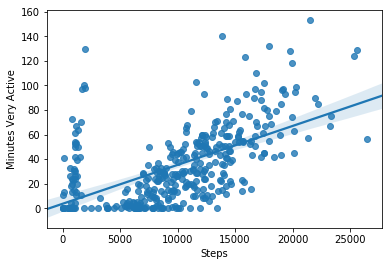

In [17]:
ax = sns.regplot(x="Steps", y="Minutes Very Active", data=fitbit)

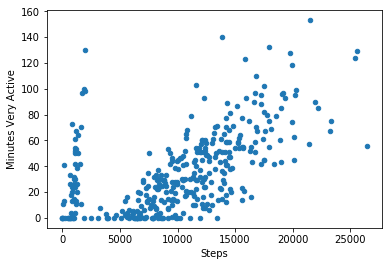

In [21]:
fitbit.plot.scatter(x='Steps', y='Minutes Very Active')



#### What can you say about Minute Very Active and Steps? Write a comment below

Correlation function its around 0.57, what  it looks like a strong positive correlation between both of them. As much as you walk the wrist band register these minutes as very active phisically. The scatter plot confirms it visually. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [18]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

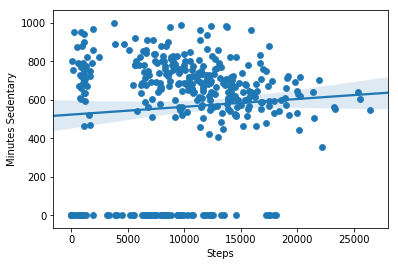

In [49]:
fitbit.plot.scatter(x='Steps', y='Minutes Sedentary')
ax = sns.regplot(x="Steps", y="Minutes Sedentary", data=fitbit)

If you just look to the scatter plot without regression line it seems like there is a negative realtionship between steps and minutes sedentary, so you can tend to imagine that if this person barely walks the registers for Minutes Sedenatry will be higher, and it fact that makes sense. But if you look further you can see that the coeficient is positive and nearly zero, so that implies that you cannot set a relation between both concepts. This is reinforced by the regression line which is almost plane

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [52]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

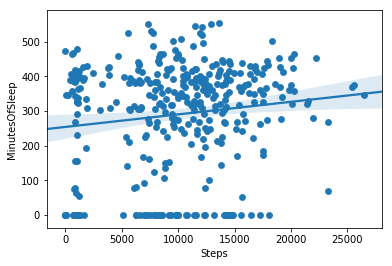

In [51]:
fitbit.plot.scatter(x='Steps', y='MinutesOfSleep')
ax = sns.regplot(x="Steps", y="MinutesOfSleep", data=fitbit)


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [74]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit=fitbit[column].corr()

display((cor_fit).head(3))

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

Minutes Very Active and Steps have the strongest relation as we saw before

In [75]:
cor_fit.sort_values(['Steps'])

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [58]:
time_grades=pd.read_csv('Time_Grades.csv').head()

In [59]:
display(time_grades)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


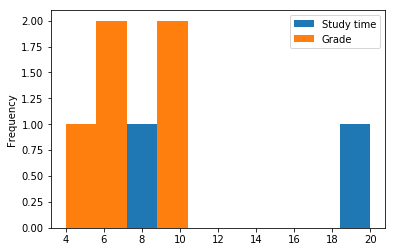

In [60]:
time_grades.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1906d84ba8>,
      dtype=object)

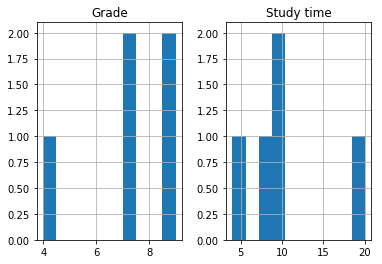

In [61]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

both of them are correlated as the coeficiente shows positive values higher tan 0.5

In [78]:
pearson=time_grades.corr()
display(pearson)

,Study time,Grade
Study time,1.000000,0.694961
Grade,0.694961,1.000000


In [63]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.527046
Grade,0.527046,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Aparently, and even though the sample is reduced, it looks like there's a positive correlation between hpurs spent studying and the grade this students achieved. The most they studied, the highest grade they got.

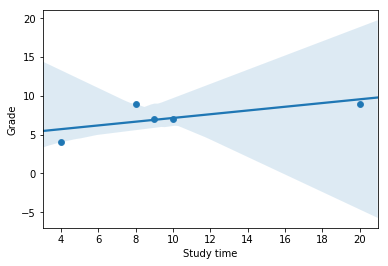

In [64]:
time_grades.plot.scatter(x='Study time', y='Grade')
ax = sns.regplot(x="Study time", y="Grade", data=time_grades)

In [65]:
#plt.figure(figsize=(10,5))
#plt.plot(time_grades['Study time'],time_grades['Grade'],'ok')
#plt.grid()
#plt.xlabel('Study Time (hours)')
#plt.ylabel('Grade')
#plt.show()

#### Could you explain the difference between Pearson and Spearman correlation?

La correlación de Pearson es lineal mientars que la de Spearman no lo es y  unicamente nos indica el sentido de esa correlación
